In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Amazon sales.csv')

In [4]:
df.head()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-2025,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-2025,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-2025,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-2025,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-2025,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order ID           250 non-null    object
 1   Date               250 non-null    object
 2   Product            250 non-null    object
 3   Category           250 non-null    object
 4   Price              250 non-null    int64 
 5   Quantity           250 non-null    int64 
 6   Total Sales        250 non-null    int64 
 7   Customer Name      250 non-null    object
 8   Customer Location  250 non-null    object
 9   Payment Method     250 non-null    object
 10  Status             250 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.6+ KB


In [6]:
df.describe()

,Price,Quantity,Total Sales
count,250.000000,250.000000,250.000000
mean,343.580000,2.856000,975.380000
std,380.635808,1.429489,1252.112254
min,15.000000,1.000000,15.000000
25%,40.000000,2.000000,100.000000
50%,150.000000,3.000000,400.000000
75%,600.000000,4.000000,1500.000000
max,1200.000000,5.000000,6000.000000


In [7]:
df.columns

Index(['Order ID', 'Date', 'Product', 'Category', 'Price', 'Quantity',
       'Total Sales', 'Customer Name', 'Customer Location', 'Payment Method',
       'Status'],
      dtype='object')

In [8]:
df.shape

(250, 11)

In [9]:
df.isnull().sum()

,0
Order ID,0
Date,0
Product,0
Category,0
Price,0
Quantity,0
Total Sales,0
Customer Name,0
Customer Location,0
Payment Method,0


In [10]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.drop_duplicates(inplace=True)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dropna(inplace=True)

<ipython-input-12-2079e60372ab>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


<Axes: xlabel='Category', ylabel='count'>

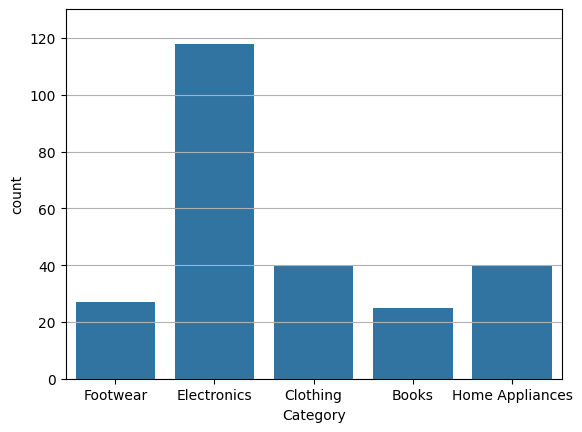

In [14]:
df['Total Sales'].hist(bins=20)
sns.countplot(x='Category', data=df)

<Axes: xlabel='Total Sales', ylabel='Quantity'>

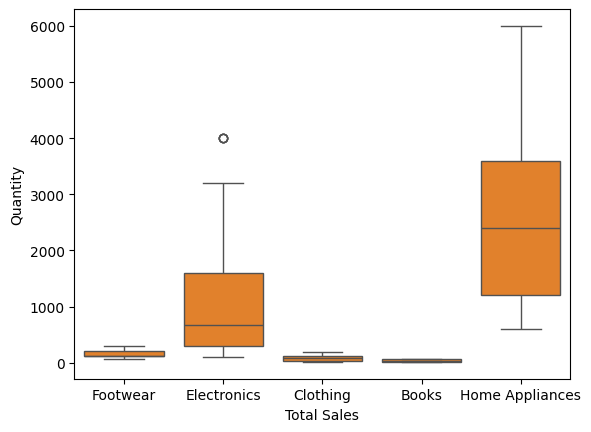

In [24]:
sns.scatterplot(x='Total Sales', y='Quantity', data=df)
sns.boxplot(x='Category', y='Total Sales', data=df)

<Axes: >

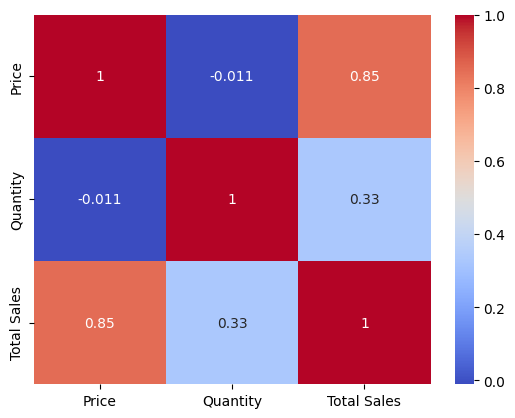

In [16]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')

<Axes: xlabel='Month'>

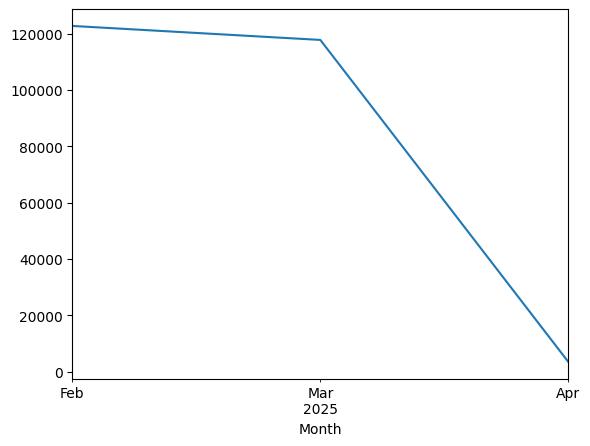

In [17]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Total Sales'].sum()
monthly_sales.plot(kind='line')


In [19]:
df['Product'].value_counts().head(10)
df.groupby('Category')['Total Sales'].sum().sort_values(ascending=False)


,Total Sales
Category,
Electronics,129950
Home Appliances,105000
Footwear,4320
Clothing,3540
Books,1035
